# ISOM3360 Project - L2 Group 28

## Data Understanding

In [1]:
# import library used for data management
import numpy as np 
import pandas as pd 

In [2]:
# load datasets
train = pd.read_csv('cars.csv')

In [3]:
# to view training set information
train.info()
# only "engine_capacity" has missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
manufacturer_name    38531 non-null object
model_name           38531 non-null object
transmission         38531 non-null object
color                38531 non-null object
odometer_value       38531 non-null int64
year_produced        38531 non-null int64
engine_fuel          38531 non-null object
engine_has_gas       38531 non-null bool
engine_type          38531 non-null object
engine_capacity      38521 non-null float64
body_type            38531 non-null object
has_warranty         38531 non-null bool
state                38531 non-null object
drivetrain           38531 non-null object
price_usd            38531 non-null float64
is_exchangeable      38531 non-null bool
location_region      38531 non-null object
number_of_photos     38531 non-null int64
up_counter           38531 non-null int64
feature_0            38531 non-null bool
feature_1            38531 non-null bool


In [4]:
train.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


## Data Preparation

In [5]:
# drop feature 2-9 as there's no concrete information on what the features exactly are
train_drop = train.drop(columns=['feature_2','feature_3','feature_4','feature_5','feature_6','feature_7'\
                            ,'feature_8','feature_9'])

In [6]:
train_drop.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,owned,all,10900.00,False,Минская обл.,9,13,False,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,owned,all,5000.00,True,Минская обл.,12,54,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,owned,all,2800.00,True,Минская обл.,4,72,False,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,owned,all,9999.00,True,Минская обл.,9,42,True,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,7


In [7]:
# categorical columns that requires one hot encoding:
#'manufacturer_name', 'model_name','transmission','color','engine_fuel',
#'engine_has_gas','engine_type','body_type','has_warranty','state','drivetrain'
#'is_exchangeable','location_region','feature_0','feature_1'

##### manufacturer_name

In [8]:
# find the top categories for column 'manufacturer_name'
train_drop.manufacturer_name.value_counts().sort_values(ascending = False).head(50)

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [9]:
# make a list of the most frequent categories of the column
top_manufacturer_name = ['manufacturer_name_' + each for each in \
                         train_drop.manufacturer_name.value_counts().sort_values(ascending = False).head(20).index]

In [10]:
manufacturer_name_dummy = pd.get_dummies(train['manufacturer_name'],prefix='manufacturer_name')

In [11]:
manufacturer_name_dummy = manufacturer_name_dummy[top_manufacturer_name]

In [12]:
manufacturer_name_dummy

,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,manufacturer_name_Ford,manufacturer_name_Renault,manufacturer_name_Audi,manufacturer_name_Mercedes-Benz,manufacturer_name_Peugeot,manufacturer_name_Citroen,manufacturer_name_Nissan,manufacturer_name_Mazda,manufacturer_name_Toyota,manufacturer_name_Hyundai,manufacturer_name_Skoda,manufacturer_name_Kia,manufacturer_name_Mitsubishi,manufacturer_name_Fiat,manufacturer_name_Honda,manufacturer_name_Volvo,manufacturer_name_ВАЗ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### model_name

In [13]:
# find the top categories for column 'model_name'
train_drop.model_name.value_counts().sort_values(ascending = False).head(50)

Passat      1423
Astra        751
Golf         707
A6           687
Mondeo       637
Vectra       565
Laguna       548
A4           505
406          415
Omega        387
Focus        380
Megane       377
100          371
Octavia      367
Zafira       356
Xantia       355
525          354
Primera      346
Scenic       323
626          321
C5           316
80           304
Transit      301
X5           297
Civic        289
520          288
6            269
Rapid        242
Jetta        237
Accord       237
320          234
323          233
Santa Fe     226
Sprinter     225
T4           203
Touran       200
Escort       193
Almera       191
318          189
307          184
Galaxy       183
308          177
Sportage     173
Sharan       169
E200         165
Corolla      164
Rio          162
Avensis      159
Qashqai      159
Sorento      155
Name: model_name, dtype: int64

In [14]:
# make a list of the most frequent categories of the column
top_model_name = ['model_name_' + each for each in \
                         train_drop.model_name.value_counts().sort_values(ascending = False).head(30).index]

In [15]:
model_name_dummy = pd.get_dummies(train['model_name'],prefix='model_name')

In [16]:
model_name_dummy = model_name_dummy[top_model_name]

In [17]:
model_name_dummy

,model_name_Passat,model_name_Astra,model_name_Golf,model_name_A6,model_name_Mondeo,model_name_Vectra,model_name_Laguna,model_name_A4,model_name_406,model_name_Omega,...,model_name_C5,model_name_80,model_name_Transit,model_name_X5,model_name_Civic,model_name_520,model_name_6,model_name_Rapid,model_name_Jetta,model_name_Accord
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### transmission

In [18]:
# find the top categories for column 'transmission'
train_drop.transmission.value_counts().sort_values(ascending = False).head(10)

mechanical    25633
automatic     12898
Name: transmission, dtype: int64

In [19]:
transmission_dummy = pd.get_dummies(train_drop['transmission'],drop_first=True,prefix='transmission')

In [20]:
transmission_dummy

,transmission_mechanical
0,0
1,0
2,0
3,1
4,0
...,...
38526,0
38527,1
38528,0
38529,1


##### color

In [21]:
# find the top categories for column 'color'
train_drop.color.value_counts().sort_values(ascending = False).head(20)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64

In [22]:
color_dummy = pd.get_dummies(train_drop['color'],prefix='color')

In [23]:
color_dummy

,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,0,0,0,0,0,0,0,1,0,0,0
38527,0,1,0,0,0,0,0,0,0,0,0,0
38528,0,1,0,0,0,0,0,0,0,0,0,0
38529,1,0,0,0,0,0,0,0,0,0,0,0


##### engine_fuel 

In [24]:
# find the top categories for column 'engine_fuel'
train_drop.engine_fuel.value_counts().sort_values(ascending = False).head(10)

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64

In [25]:
engine_fuel_dummy = pd.get_dummies(train_drop['engine_fuel'],prefix='engine_fuel')

In [26]:
engine_fuel_dummy

,engine_fuel_diesel,engine_fuel_electric,engine_fuel_gas,engine_fuel_gasoline,engine_fuel_hybrid-diesel,engine_fuel_hybrid-petrol
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
38526,0,0,0,1,0,0
38527,1,0,0,0,0,0
38528,0,0,0,1,0,0
38529,0,0,0,1,0,0


##### engine_has_gas

In [27]:
engine_has_gas_dummy = pd.get_dummies(train_drop['engine_has_gas'],drop_first=True,prefix='engine_has_gas')

In [28]:
engine_has_gas_dummy

,engine_has_gas_True
0,0
1,0
2,0
3,0
4,0
...,...
38526,0
38527,0
38528,0
38529,0


##### engine_type  

In [29]:
# find the top categories for column 'engine_type'
train_drop.engine_type.value_counts().sort_values(ascending = False).head(10)

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [30]:
engine_type_dummy = pd.get_dummies(train_drop['engine_type'],drop_first=True,prefix='engine_type')

In [31]:
engine_type_dummy

,engine_type_electric,engine_type_gasoline
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
38526,0,1
38527,0,0
38528,0,1
38529,0,1


##### engine_capacity (with missing values)

In [32]:
train_drop['engine_capacity'].describe()

count    38521.000000
mean         2.055161
std          0.671178
min          0.200000
25%          1.600000
50%          2.000000
75%          2.300000
max          8.000000
Name: engine_capacity, dtype: float64

In [33]:
train_drop['engine_capacity'].fillna(train_drop['engine_capacity'].mean(),inplace=True)

In [34]:
train_drop['engine_capacity'].describe()

count    38531.000000
mean         2.055161
std          0.671091
min          0.200000
25%          1.600000
50%          2.000000
75%          2.300000
max          8.000000
Name: engine_capacity, dtype: float64

##### body_type 

In [35]:
# find the top categories for column 'body_type'
train_drop.body_type.value_counts().sort_values(ascending = False).head(20)

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64

In [36]:
body_type_dummy = pd.get_dummies(train_drop['body_type'],prefix='body_type')

In [37]:
body_type_dummy

,body_type_cabriolet,body_type_coupe,body_type_hatchback,body_type_liftback,body_type_limousine,body_type_minibus,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,0,0,0,0,0,0,0,1,0,0,0
38527,0,0,1,0,0,0,0,0,0,0,0,0
38528,0,0,0,0,0,0,0,0,1,0,0,0
38529,0,0,0,0,0,0,1,0,0,0,0,0


##### has_warranty 

In [38]:
has_warranty_dummy = pd.get_dummies(train_drop['has_warranty'],drop_first=True,prefix='has_warranty')

In [39]:
has_warranty_dummy

,has_warranty_True
0,0
1,0
2,0
3,0
4,0
...,...
38526,0
38527,0
38528,0
38529,0


##### state 

In [40]:
# find the top categories for column 'state'
train_drop.state.value_counts().sort_values(ascending = False).head(10)

owned        37723
new            438
emergency      370
Name: state, dtype: int64

In [41]:
state_dummy = pd.get_dummies(train_drop['state'],drop_first=True,prefix='state')

In [42]:
state_dummy

,state_new,state_owned
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
38526,0,1
38527,0,1
38528,0,1
38529,0,1


##### drivetrain         

In [43]:
# find the top categories for column 'drivetrain'
train_drop.drivetrain.value_counts().sort_values(ascending = False).head(10)

front    27746
rear      5398
all       5387
Name: drivetrain, dtype: int64

In [44]:
drivetrain_dummy = pd.get_dummies(train_drop['drivetrain'],drop_first=True,prefix='drivetrain')

In [45]:
drivetrain_dummy

,drivetrain_front,drivetrain_rear
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
38526,1,0
38527,1,0
38528,1,0
38529,1,0


##### is_exchangeable

In [46]:
is_exchangeable_dummy = pd.get_dummies(train_drop['is_exchangeable'],drop_first=True,prefix='is_exchangeable')

In [47]:
is_exchangeable_dummy

,is_exchangeable_True
0,0
1,1
2,1
3,1
4,1
...,...
38526,1
38527,1
38528,0
38529,1


##### location_region

In [48]:
# find the top categories for column 'location_region'
train_drop.location_region.value_counts().sort_values(ascending = False).head(10)

Минская обл.        24230
Гомельская обл.      3140
Витебская обл.       3007
Брестская обл.       2991
Могилевская обл.     2678
Гродненская обл.     2485
Name: location_region, dtype: int64

In [49]:
location_region_dummy = pd.get_dummies(train_drop['location_region'],prefix='location_region')

In [50]:
location_region_dummy

,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
38526,0,0,0,0,1,0
38527,1,0,0,0,0,0
38528,0,0,0,0,1,0
38529,1,0,0,0,0,0


##### feature_0 

In [51]:
feature_0_dummy = pd.get_dummies(train_drop['feature_0'],drop_first=True,prefix='feature_0')

In [52]:
feature_0_dummy

,feature_0_True
0,0
1,0
2,0
3,1
4,0
...,...
38526,0
38527,0
38528,0
38529,0


##### feature_1

In [53]:
feature_1_dummy = pd.get_dummies(train_drop['feature_1'],drop_first=True,prefix='feature_1')

In [54]:
feature_1_dummy

,feature_1_True
0,1
1,1
2,1
3,0
4,1
...,...
38526,1
38527,1
38528,1
38529,1


##### Label : price_usd

In [55]:
train['price_usd'].head()

0    10900.00
1     5000.00
2     2800.00
3     9999.00
4     2134.11
Name: price_usd, dtype: float64

In [56]:
train['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

In [57]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(18,6))

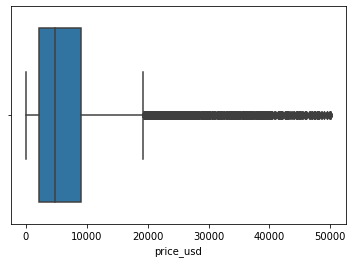

In [58]:
ax = sns.boxplot(train['price_usd'])

In [59]:
# one hot encoding to label, divide by price above mean or not (look for predocted label at 1)
# also useful for budget constraint at $4800 (look for predicted label at 0)
price_above_median = []
for i in train['price_usd']:
    if i > 4800:
        price_above_median.append(1)
    else:
        price_above_median.append(0)

In [60]:
from pandas import DataFrame

In [61]:
df = pd.DataFrame(train)
df['price_above_median'] = pd.DataFrame(price_above_median,columns=['price_above_median'])
df['price_above_median']

0        1
1        1
2        0
3        1
4        0
        ..
38526    0
38527    0
38528    0
38529    0
38530    0
Name: price_above_median, Length: 38531, dtype: int64

#### Adding dummy columns to the existing dataframe

In [62]:
train_dummy = pd.concat([df['price_above_median'],train_drop,manufacturer_name_dummy,model_name_dummy,transmission_dummy,\
                         color_dummy,engine_fuel_dummy,engine_has_gas_dummy,engine_type_dummy,\
                         body_type_dummy,has_warranty_dummy,state_dummy,drivetrain_dummy,is_exchangeable_dummy,\
                         location_region_dummy,feature_0_dummy,feature_1_dummy],axis=1,sort=True)

In [63]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 0 to 38530
Columns: 121 entries, price_above_median to feature_1_True
dtypes: bool(5), float64(2), int64(6), object(10), uint8(98)
memory usage: 9.4+ MB


In [64]:
train_dummy.head()

,price_above_median,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
0,1,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,...,0,0,0,0,0,0,1,0,0,1
1,1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,...,0,1,0,0,0,0,1,0,0,1
2,0,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,...,0,1,0,0,0,0,1,0,0,1
3,1,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,...,0,1,0,0,0,0,1,0,1,0
4,0,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,...,0,1,0,0,1,0,0,0,0,1


In [65]:
# drop columns that are not needed
train_tree=train_dummy.drop(columns=['manufacturer_name','model_name','transmission','color','engine_fuel',\
                             'engine_has_gas','engine_type','body_type','has_warranty','state','drivetrain',\
                             'is_exchangeable','location_region','feature_0','feature_1','price_usd'])

In [66]:
train_tree.head()

,price_above_median,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
0,1,190000,2010,2.5,9,13,16,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,290000,2002,3.0,12,54,83,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,402000,2001,2.5,4,72,151,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1,10000,1999,3.0,9,42,86,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,280000,2001,2.5,14,7,7,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [67]:
train_tree.describe()

,price_above_median,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,...,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,0.496172,248864.638447,2002.943734,2.055161,9.649062,16.306091,80.577249,0.110119,0.071605,0.067738,...,0.140095,0.352599,0.077626,0.078041,0.081493,0.064494,0.628844,0.069502,0.228543,0.607199
std,0.499992,136072.376530,8.065731,0.671091,6.093217,43.286933,112.826569,0.313042,0.257836,0.251298,...,0.347090,0.477785,0.267585,0.268240,0.273594,0.245633,0.483120,0.254310,0.419900,0.488379
min,0.000000,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1000000.000000,2019.000000,8.000000,86.000000,1861.000000,2232.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Binary Classification (price_above_median)
### 1. Ensemble Learning Decision Tree 
### 2. Logistic Regression
### 3. Naive Bayes
### 4. K-Nearest Neighbor (KNN)
### 5. Ensemble Learning: Majority Voting for Binary Classifiers

# 1. Ensemble Learning Decision Tree

## Modeling

In [68]:
# select features
features_tree = list(train_tree.columns)
features_tree.remove('price_above_median')
features_tree

['odometer_value',
 'year_produced',
 'engine_capacity',
 'number_of_photos',
 'up_counter',
 'duration_listed',
 'manufacturer_name_Volkswagen',
 'manufacturer_name_Opel',
 'manufacturer_name_BMW',
 'manufacturer_name_Ford',
 'manufacturer_name_Renault',
 'manufacturer_name_Audi',
 'manufacturer_name_Mercedes-Benz',
 'manufacturer_name_Peugeot',
 'manufacturer_name_Citroen',
 'manufacturer_name_Nissan',
 'manufacturer_name_Mazda',
 'manufacturer_name_Toyota',
 'manufacturer_name_Hyundai',
 'manufacturer_name_Skoda',
 'manufacturer_name_Kia',
 'manufacturer_name_Mitsubishi',
 'manufacturer_name_Fiat',
 'manufacturer_name_Honda',
 'manufacturer_name_Volvo',
 'manufacturer_name_ВАЗ',
 'model_name_Passat',
 'model_name_Astra',
 'model_name_Golf',
 'model_name_A6',
 'model_name_Mondeo',
 'model_name_Vectra',
 'model_name_Laguna',
 'model_name_A4',
 'model_name_406',
 'model_name_Omega',
 'model_name_Focus',
 'model_name_Megane',
 'model_name_100',
 'model_name_Octavia',
 'model_name_Zafira

In [69]:
# select target variable
target_tree = ['price_above_median']
target_tree

['price_above_median']

In [70]:
X_tree = train_tree [features_tree]
y_tree = train_tree [target_tree]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size = 0.20, random_state = 5)

#### Grid Search CV

In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

In [74]:
# make an array of depths to choose from, say 1 to 20
depths = np.arange(1, 21)
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [75]:
# define the number to try out for max leaf nodes 
num_leafs = [10, 20, 50, 100, 200]
num_leafs

[10, 20, 50, 100, 200]

In [76]:
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
try_grid

[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20]), 'max_leaf_nodes': [10, 20, 50, 100, 200]}]

In [77]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
# define your Model using GridSearchCV
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=3)

In [79]:
DTM.fit(X_train_tree,y_train_tree)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
 

In [80]:
#find the best parameters
DTM.best_params_

{'max_depth': 14, 'max_leaf_nodes': 100}

In [81]:
DTM.best_score_

0.9207760186867376

In [82]:
best_DT_model = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 14)

In [83]:
best_DT_model.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
# test model
pred_val_tree=best_DT_model.predict(X_test_tree)
pred_val_tree

array([0, 0, 0, ..., 0, 1, 0])

In [85]:
#Now show actual
y_test_tree

,price_above_median
15078,0
29351,0
12417,0
26223,0
34862,1
...,...
11439,0
21368,0
24082,0
9786,1


In [86]:
# import evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [87]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_val_tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_val_tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_val_tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_val_tree))

MAE: 0.07149344751524588
Accuracy: 0.9285065524847541
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3938
           1       0.93      0.92      0.93      3769

    accuracy                           0.93      7707
   macro avg       0.93      0.93      0.93      7707
weighted avg       0.93      0.93      0.93      7707

Confusion Matrix: 
 [[3672  266]
 [ 285 3484]]


In [88]:
# import visualization functions
from sklearn import tree
from matplotlib import pyplot as plt

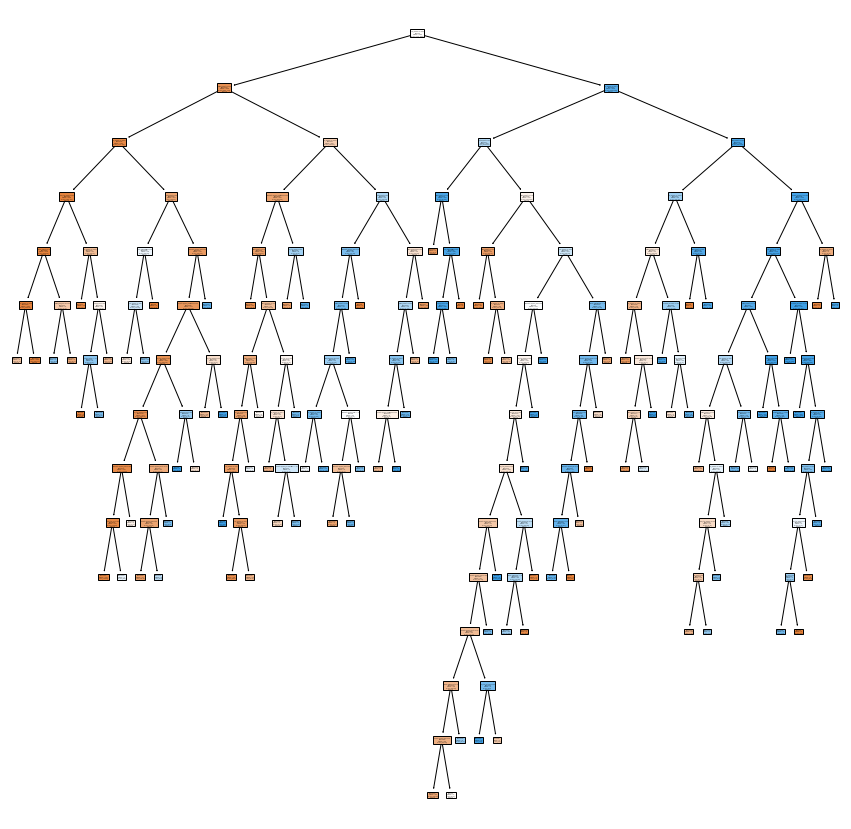

In [89]:
# visualized tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(best_DT_model, 
                   feature_names = features_tree,  
                   class_names = 'price_above_median',
                   filled=True)

In [90]:
DT5_model = DecisionTreeClassifier(max_depth = 5)

In [91]:
DT5_model.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
# test model
pred_val_5tree=DT5_model.predict(X_test_tree)
pred_val_5tree

array([0, 0, 0, ..., 0, 1, 0])

In [93]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_val_5tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_val_5tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_val_5tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_val_5tree))

MAE: 0.09329181263786168
Accuracy: 0.9067081873621383
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      3938
           1       0.88      0.93      0.91      3769

    accuracy                           0.91      7707
   macro avg       0.91      0.91      0.91      7707
weighted avg       0.91      0.91      0.91      7707

Confusion Matrix: 
 [[3467  471]
 [ 248 3521]]


In [94]:
DT10_model = DecisionTreeClassifier(max_depth = 10)

In [95]:
DT10_model.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
# test model
pred_val_10tree=DT10_model.predict(X_test_tree)
pred_val_10tree

array([0, 0, 0, ..., 0, 1, 0])

In [97]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_val_10tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_val_10tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_val_10tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_val_10tree))

MAE: 0.07629427792915532
Accuracy: 0.9237057220708447
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      3938
           1       0.92      0.92      0.92      3769

    accuracy                           0.92      7707
   macro avg       0.92      0.92      0.92      7707
weighted avg       0.92      0.92      0.92      7707

Confusion Matrix: 
 [[3657  281]
 [ 307 3462]]


In [98]:
DT15_model = DecisionTreeClassifier(max_depth = 15)

In [99]:
DT15_model.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
# test model
pred_val_15tree=DT15_model.predict(X_test_tree)
pred_val_15tree

array([0, 0, 0, ..., 0, 1, 0])

In [101]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_val_15tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_val_15tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_val_15tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_val_15tree))

MAE: 0.08485792137018296
Accuracy: 0.915142078629817
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      3938
           1       0.91      0.91      0.91      3769

    accuracy                           0.92      7707
   macro avg       0.92      0.92      0.92      7707
weighted avg       0.92      0.92      0.92      7707

Confusion Matrix: 
 [[3607  331]
 [ 323 3446]]


In [102]:
DT20_model = DecisionTreeClassifier(max_depth = 20)

In [103]:
DT20_model.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
# test model
pred_val_20tree=DT20_model.predict(X_test_tree)
pred_val_20tree

array([0, 0, 0, ..., 0, 1, 0])

In [105]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_val_20tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_val_20tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_val_20tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_val_20tree))

MAE: 0.09549759958479305
Accuracy: 0.9045024004152069
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3938
           1       0.90      0.90      0.90      3769

    accuracy                           0.90      7707
   macro avg       0.90      0.90      0.90      7707
weighted avg       0.90      0.90      0.90      7707

Confusion Matrix: 
 [[3565  373]
 [ 363 3406]]


#### Ensemble Learning with Different Tree Depths

- When we fit the data to a deeper decision tree model, it may face overfitting problem. So for this dataset, we use ensemble learning by taking into account all the previously built trees

- At the same time, we would like to use the Voting Classifier to get more accurate and less likely to be overfitting model

In [106]:
from sklearn.ensemble import VotingClassifier

In [107]:
#create a dictionary of our models
estimators=[('DT14', best_DT_model), ('DT5', DT5_model), ('DT10', DT10_model),\
            ('DT15', DT15_model),('DT20', DT20_model)]

In [108]:
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [109]:
ensemble.fit(X_train_tree,y_train_tree)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('DT14',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=14,
                                                     max_features=None,
                                                     max_leaf_nodes=100,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
       

In [110]:
#fit model to training data
pred_ensemble_tree = ensemble.predict(X_test_tree)
pred_ensemble_tree

array([0, 0, 0, ..., 0, 1, 0])

In [111]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_ensemble_tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_ensemble_tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_ensemble_tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_ensemble_tree))

MAE: 0.07369923446217724
Accuracy: 0.9263007655378228
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      3938
           1       0.92      0.93      0.92      3769

    accuracy                           0.93      7707
   macro avg       0.93      0.93      0.93      7707
weighted avg       0.93      0.93      0.93      7707

Confusion Matrix: 
 [[3640  298]
 [ 270 3499]]


#### Side Note: Using 1-node decision tree

In the following case, we will try to fit the decision tree by only using one-node

In [112]:
DT1_model = DecisionTreeClassifier(max_depth = 1)

In [113]:
DT1_model.fit(X_train_tree,y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
# test model
pred_val_1tree=DT1_model.predict(X_test_tree)
pred_val_1tree

array([0, 0, 0, ..., 0, 1, 0])

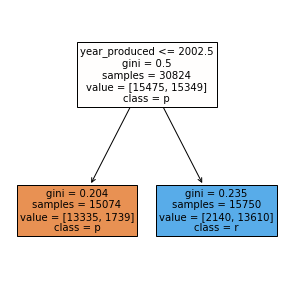

In [115]:
# visualized tree
fig = plt.figure(figsize=(5,5))
_ = tree.plot_tree(DT1_model, 
                   feature_names = features_tree,  
                   class_names = 'price_above_median',
                   filled=True)

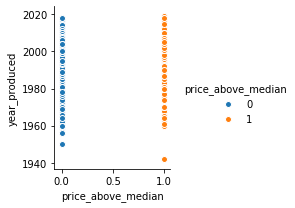

In [116]:
g = sns.FacetGrid(train_tree, hue='price_above_median', margin_titles=True)
g=g.map(plt.scatter, 'price_above_median', 'year_produced',edgecolor='w').add_legend()

In [119]:
# evaluate result 
print("MAE:",mean_absolute_error(y_test_tree, pred_val_1tree))
print("Accuracy:",accuracy_score(y_test_tree, pred_val_1tree, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(y_test_tree, pred_val_1tree))
print("Confusion Matrix:", '\n', confusion_matrix(y_test_tree, pred_val_1tree))

MAE: 0.1263786168418321
Accuracy: 0.873621383158168
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      3938
           1       0.86      0.89      0.87      3769

    accuracy                           0.87      7707
   macro avg       0.87      0.87      0.87      7707
weighted avg       0.87      0.87      0.87      7707

Confusion Matrix: 
 [[3390  548]
 [ 426 3343]]


To conclude, we find out that even when we only use 1-node, the accuracy generated is around 87.36% which is not too bad. Hence, the most important root node is actually the 'Year_produced<=2002.5'. In this way, people without any python prgrams on hand can actually do instant classification prediction on car price with this feature, it gives reasonable accuracy and is convenient.

# 2. Logistic Regression

In [120]:
train_to_be_normal=train_tree

In [121]:
train_to_be_normal.head()

,price_above_median,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
0,1,190000,2010,2.5,9,13,16,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,290000,2002,3.0,12,54,83,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,402000,2001,2.5,4,72,151,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,1,10000,1999,3.0,9,42,86,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,280000,2001,2.5,14,7,7,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [122]:
# define attributes and target variable
features_lc = list(train_to_be_normal.columns)
features_lc.remove('price_above_median')

In [123]:
X_lr = train_to_be_normal [features_lc]
y_lr = train_to_be_normal ['price_above_median']

In [124]:
from sklearn import preprocessing
# Apply z-score normalization on all explanatory attributes
zscore_scaler = preprocessing.StandardScaler().fit(X_lr)
X_lr_normal = pd.DataFrame(zscore_scaler.transform(X_lr), columns = X_lr.columns)

In [125]:
X_lr_normal.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,manufacturer_name_Ford,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
0,-0.432604,0.874857,0.662868,-0.106523,-0.076377,-0.572366,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,-0.737996,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,-0.544288,0.804304
1,0.302309,-0.117007,1.407934,0.385834,0.870803,0.021474,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,-0.544288,0.804304
2,1.125411,-0.240990,0.662868,-0.927119,1.286638,0.624176,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,-0.544288,0.804304
3,-1.755446,-0.488956,1.407934,-0.106523,0.593580,0.048063,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,1.837264,-1.243310
4,0.228818,-0.240990,0.662868,0.714072,-0.214989,-0.652135,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,3.357234,-0.262564,-1.301648,-0.273302,-0.544288,0.804304


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [127]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr_normal, y_lr, test_size = 0.20, random_state = 5)

In [128]:
# Fit the model
lr=LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga', max_iter = 4000)
lr.fit(X_train_lr, y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
# Get regression coefficient
lr.coef_

array([[-3.21498597e-01,  4.01621254e+00,  8.30599481e-01,
         2.35271496e-01, -6.11605341e-02,  2.00582679e-01,
         7.90618135e-01,  7.90223221e-02,  4.40164085e-01,
         1.36748557e-01, -9.44817413e-03,  6.82999443e-01,
         3.66676708e-01,  1.02019750e-01,  1.14457906e-02,
         1.19855982e-01,  1.04187117e-01,  4.01885226e-01,
         4.31702035e-02,  1.81437033e-01,  2.83106215e-02,
         6.97510440e-02, -6.17037331e-02,  1.92056756e-01,
         2.74092385e-01, -3.93569354e-01, -3.84849949e-02,
         1.04269512e-01, -1.11911340e-01,  9.08746584e-03,
        -3.38462135e-02,  1.00635021e-01, -2.05552111e-02,
         6.18353996e-02, -1.52298312e-01, -2.86254022e-01,
        -2.47622510e-02, -1.82288524e-02, -1.84374993e-01,
         7.55506041e-02,  2.68015133e-02, -2.44351696e-01,
         3.12372963e-02, -7.52712061e-02, -6.27838354e-02,
        -2.36448827e-01,  3.73627808e-02,  1.28338163e-04,
        -8.84074639e-02,  4.02838539e-02,  4.36988680e-0

In [130]:
# Get regression intercept
lr.intercept_

array([-0.28498617])

In [131]:
from sklearn.model_selection import cross_val_predict
proba_y_lr = cross_val_predict(lr, X_test_lr, y_test_lr, cv=3, method='predict_proba')
proba_y_lr

array([[9.99628130e-01, 3.71870221e-04],
       [9.99781404e-01, 2.18595919e-04],
       [9.99437966e-01, 5.62034167e-04],
       ...,
       [9.98741846e-01, 1.25815358e-03],
       [3.61621911e-01, 6.38378089e-01],
       [9.96754085e-01, 3.24591512e-03]])

In [132]:
proba_y_1_lr = proba_y_lr[:,1]
# threshold for '1' to be 0.5
proba_y_1_lt= [1 if i >= 0.5 else 0 for i in proba_y_1_lr]
proba_y_1_lt

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,


In [133]:
# Evaluation
print("Confusion Matrix:", '\n',confusion_matrix(y_test_lr, proba_y_1_lt))
print("Accuracy:",accuracy_score(y_test_lr, proba_y_1_lt, normalize=True, sample_weight=None))

Confusion Matrix: 
 [[3650  288]
 [ 285 3484]]
Accuracy: 0.9256520046710782


In [134]:
print(classification_report(y_test_lr, proba_y_1_lt))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3938
           1       0.92      0.92      0.92      3769

    accuracy                           0.93      7707
   macro avg       0.93      0.93      0.93      7707
weighted avg       0.93      0.93      0.93      7707



In [135]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [136]:
# calculate tpr and fpr based on different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test_lr,proba_y_1_lr,pos_label=1)

In [137]:
metrics.auc(fpr, tpr)
# cal area under curve

0.977577565019813

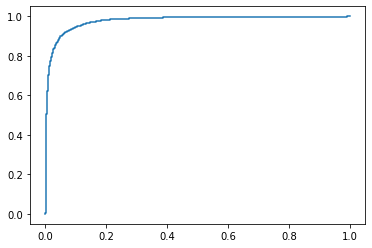

In [138]:
plt.plot(fpr,tpr)

# 3. Multinomial Naive Bayes

In [139]:
train_drop['engine_capacity'].fillna(train_drop['engine_capacity'].mean(),inplace=True)
train_drop

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,owned,all,10900.00,False,Минская обл.,9,13,False,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,owned,all,5000.00,True,Минская обл.,12,54,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,owned,all,2800.00,True,Минская обл.,4,72,False,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,owned,all,9999.00,True,Минская обл.,9,42,True,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,owned,front,2750.00,True,Минская обл.,5,85,False,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,owned,front,4800.00,True,Брестская обл.,4,20,False,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,owned,front,4300.00,False,Минская обл.,3,63,False,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,owned,front,4000.00,True,Брестская обл.,7,156,False,True,490


In [140]:
train_drop.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671091,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [141]:
# Categorize all numerical features

In [142]:
odometer_value_range = []
for i in train_drop['odometer_value']:
    if i < 158000:
        odometer_value_range.append('0-25%')
    elif i < 250000:
        odometer_value_range.append('25-50%')
    elif i < 325000:
        odometer_value_range.append('50-75%')
    else:
        odometer_value_range.append('75-100%')

In [143]:
df['odometer_value_range'] = DataFrame (odometer_value_range,columns=['odometer_value_range'])

In [144]:
year_produced_range = []
for i in train_drop['year_produced']:
    if i < 1998:
        year_produced_range.append('0-25%')
    elif i < 2003:
        year_produced_range.append('25-50%')
    elif i < 2009:
        year_produced_range.append('50-75%')
    else:
        year_produced_range.append('75-100%')

In [145]:
df['year_produced_range'] = DataFrame (year_produced_range,columns=['year_produced_range'])

In [146]:
engine_capacity_range = []
for i in train_drop['engine_capacity']:
    if i < 1.6:
        engine_capacity_range.append('0-25%')
    elif i < 2:
        engine_capacity_range.append('25-50%')
    elif i < 2.3:
        engine_capacity_range.append('50-75%')
    else:
        engine_capacity_range.append('75-100%')

In [147]:
df['engine_capacity_range'] = DataFrame (engine_capacity_range,columns=['engine_capacity_range'])

In [148]:
number_of_photos_range = []
for i in train_drop['number_of_photos']:
    if i < 5:
        number_of_photos_range.append('0-25%')
    elif i < 8:
        number_of_photos_range.append('25-50%')
    elif i < 12:
        number_of_photos_range.append('50-75%')
    else:
        number_of_photos_range.append('75-100%')

In [149]:
df['number_of_photos_range'] = DataFrame (number_of_photos_range,columns=['number_of_photos_range'])

In [150]:
up_counter_range = []
for i in train_drop['up_counter']:
    if i < 2:
        up_counter_range.append('0-25%')
    elif i < 5:
        up_counter_range.append('25-50%')
    elif i < 16:
        up_counter_range.append('50-75%')
    else:
        up_counter_range.append('75-100%')

In [151]:
df['up_counter_range'] = DataFrame (up_counter_range,columns=['up_counter_range'])

In [152]:
duration_listed_range = []
for i in train_drop['duration_listed']:
    if i < 23:
        duration_listed_range.append('0-25%')
    elif i < 59:
        duration_listed_range.append('25-50%')
    elif i < 91:
        duration_listed_range.append('50-75%')
    else:
        duration_listed_range.append('75-100%')

In [153]:
df['duration_listed_range'] = DataFrame (duration_listed_range,columns=['duration_listed_range'])

In [154]:
train_to_be_mnb = pd.concat([df['price_above_median'],df['odometer_value_range'],df['year_produced_range'],\
                             df['engine_capacity_range'],df['number_of_photos_range'],df['up_counter_range'], \
                             df['duration_listed_range'], train_drop],axis=1,sort=True)

In [155]:
train_to_be_mnb.head()

,price_above_median,odometer_value_range,year_produced_range,engine_capacity_range,number_of_photos_range,up_counter_range,duration_listed_range,manufacturer_name,model_name,transmission,...,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,duration_listed
0,1,25-50%,75-100%,75-100%,50-75%,50-75%,0-25%,Subaru,Outback,automatic,...,owned,all,10900.00,False,Минская обл.,9,13,False,True,16
1,1,50-75%,25-50%,75-100%,75-100%,75-100%,50-75%,Subaru,Outback,automatic,...,owned,all,5000.00,True,Минская обл.,12,54,False,True,83
2,0,75-100%,25-50%,75-100%,0-25%,75-100%,75-100%,Subaru,Forester,automatic,...,owned,all,2800.00,True,Минская обл.,4,72,False,True,151
3,1,0-25%,25-50%,75-100%,50-75%,75-100%,50-75%,Subaru,Impreza,mechanical,...,owned,all,9999.00,True,Минская обл.,9,42,True,False,86
4,0,50-75%,25-50%,75-100%,75-100%,50-75%,0-25%,Subaru,Legacy,automatic,...,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,7


In [156]:
# drop columns that are not needed
train_mnb=train_to_be_mnb.drop(columns=['odometer_value','year_produced',\
                             'engine_capacity','number_of_photos','up_counter', \
                             'duration_listed','price_usd'])

In [157]:
train_mnb.head()

,price_above_median,odometer_value_range,year_produced_range,engine_capacity_range,number_of_photos_range,up_counter_range,duration_listed_range,manufacturer_name,model_name,transmission,...,engine_has_gas,engine_type,body_type,has_warranty,state,drivetrain,is_exchangeable,location_region,feature_0,feature_1
0,1,25-50%,75-100%,75-100%,50-75%,50-75%,0-25%,Subaru,Outback,automatic,...,False,gasoline,universal,False,owned,all,False,Минская обл.,False,True
1,1,50-75%,25-50%,75-100%,75-100%,75-100%,50-75%,Subaru,Outback,automatic,...,False,gasoline,universal,False,owned,all,True,Минская обл.,False,True
2,0,75-100%,25-50%,75-100%,0-25%,75-100%,75-100%,Subaru,Forester,automatic,...,False,gasoline,suv,False,owned,all,True,Минская обл.,False,True
3,1,0-25%,25-50%,75-100%,50-75%,75-100%,50-75%,Subaru,Impreza,mechanical,...,False,gasoline,sedan,False,owned,all,True,Минская обл.,True,False
4,0,50-75%,25-50%,75-100%,75-100%,50-75%,0-25%,Subaru,Legacy,automatic,...,False,gasoline,universal,False,owned,all,True,Гомельская обл.,False,True


In [158]:
train_mnb_dummy = pd.get_dummies(train_mnb)
train_mnb_dummy.head()

,price_above_median,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,odometer_value_range_0-25%,odometer_value_range_25-50%,odometer_value_range_50-75%,odometer_value_range_75-100%,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,1,False,False,False,False,True,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
1,1,False,False,True,False,True,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
2,0,False,False,True,False,True,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,1,False,False,True,True,False,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
4,0,False,False,True,False,True,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0


In [159]:
# define independent attributes 
features_mnb = list(train_mnb_dummy.columns[1:])
# assign values for independent variables and target variable
X_mnb = train_mnb_dummy [features_mnb]
y_mnb = train_mnb_dummy ['price_above_median']

In [160]:
X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X_mnb, y_mnb, test_size = 0.20, random_state = 5)

In [161]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB

#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

In [162]:
from sklearn.model_selection import cross_val_score
score_mnb = cross_val_score(mnb,X_mnb,y_mnb,cv=3)

In [163]:
score_mnb.mean()

0.7073542055817094

In [165]:
# train model using training dataset
mnb.fit(X_train_mnb, y_train_mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
pred_y_mnb = cross_val_predict(mnb,X_test_mnb,y_test_mnb,cv=3)

In [167]:
pred_y_mnb

array([0, 0, 0, ..., 0, 1, 0])

In [168]:
mnb.class_count_

array([15475., 15349.])

In [169]:
np.exp(mnb.class_log_prior_)
#compare this with model accuracy

array([0.50204386, 0.49795614])

In [170]:
print(classification_report(y_test_mnb, pred_y_mnb))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3938
           1       0.89      0.88      0.89      3769

    accuracy                           0.89      7707
   macro avg       0.89      0.89      0.89      7707
weighted avg       0.89      0.89      0.89      7707



# 4. K-Nearest Neighbor (KNN)

In [171]:
X_knn = X_lr_normal
y_knn = train_to_be_normal['price_above_median']

In [172]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size = 0.20, random_state = 5)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
k_range = range(1,50)
error_rate = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train_knn,y_train_knn)
    pred_i = knn.predict(X_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))

Minimum error:- 0.14350590372388738 at K = 38


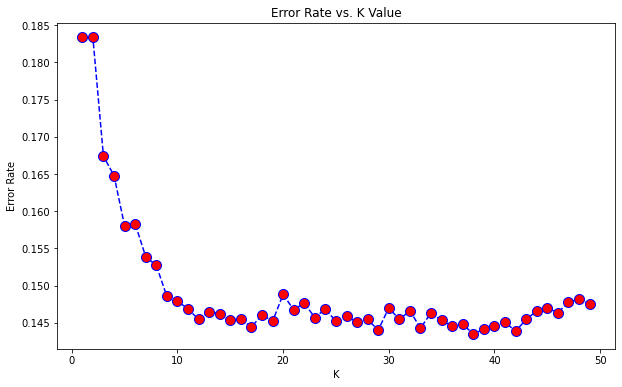

In [172]:
plt.figure(figsize=(10,6))
plt.plot(k_range,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [174]:
knn = KNeighborsClassifier(n_neighbors=38,weights='distance')

In [175]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=38, p=2,
                     weights='distance')

In [176]:
y_pred_knn = knn.predict(X_test_knn)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [177]:
# evaluate result 
print("Classification Report:\n",classification_report(y_test_knn, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      3938
           1       0.84      0.88      0.86      3769

    accuracy                           0.86      7707
   macro avg       0.86      0.86      0.86      7707
weighted avg       0.86      0.86      0.86      7707



# 5. Ensemble Learning: Majority voting for binary classifiers 

In [178]:
import statistics
ensemble_b=[]
n=0
for i in range(len(pred_val_tree.tolist())):
    ensemble_b.append(statistics.mode([pred_val_tree.tolist()[n],pred_ensemble_tree.tolist()[n],\
                                       proba_y_1_lt[n],pred_y_mnb[n],y_pred_knn[n]]))
    n=n+1
ensemble_b

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,


In [179]:
print("Classification Report:\n",classification_report(y_test_tree, ensemble_b))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3938
           1       0.93      0.93      0.93      3769

    accuracy                           0.93      7707
   macro avg       0.93      0.93      0.93      7707
weighted avg       0.93      0.93      0.93      7707



# Continuous Number Prediction (price_usd)
### 1. Linear Regression
### 2. Lasso Regression
### 3. Decision Tree Regressor
### 4. Ensemble Learning Continuous Number Prediction Prediction

# 1. Linear Regression

In [180]:
train_linear=train_dummy.drop(columns=['manufacturer_name','model_name','transmission','color','engine_fuel',\
                             'engine_has_gas','engine_type','body_type','has_warranty','state','drivetrain',\
                             'is_exchangeable','location_region','feature_0','feature_1','price_above_median'])
train_linear.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,290000,2002,3.0,5000.00,12,54,83,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,402000,2001,2.5,2800.00,4,72,151,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,10000,1999,3.0,9999.00,9,42,86,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [181]:
# select features
features_linear = list(train_linear.columns)
features_linear.remove('price_usd')

In [182]:
# select target variable
target_linear = ['price_usd']
target_linear

['price_usd']

In [183]:
X_linear = train_linear [features_linear]
y_linear = train_linear [target_linear]

In [184]:
zscore_scaler = preprocessing.StandardScaler().fit(X_linear)
X_linear = pd.DataFrame(zscore_scaler.transform(X_linear), columns = X_linear.columns)
X_linear.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,manufacturer_name_Volkswagen,manufacturer_name_Opel,manufacturer_name_BMW,manufacturer_name_Ford,...,drivetrain_rear,is_exchangeable_True,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,feature_0_True,feature_1_True
0,-0.432604,0.874857,0.662868,-0.106523,-0.076377,-0.572366,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,-0.737996,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,-0.544288,0.804304
1,0.302309,-0.117007,1.407934,0.385834,0.870803,0.021474,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,-0.544288,0.804304
2,1.125411,-0.240990,0.662868,-0.927119,1.286638,0.624176,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,-0.544288,0.804304
3,-1.755446,-0.488956,1.407934,-0.106523,0.593580,0.048063,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,-0.297864,-0.262564,0.768257,-0.273302,1.837264,-1.243310
4,0.228818,-0.240990,0.662868,0.714072,-0.214989,-0.652135,-0.351775,-0.277718,-0.269554,-0.267109,...,-0.403632,1.355021,-0.290101,-0.290942,3.357234,-0.262564,-1.301648,-0.273302,-0.544288,0.804304


In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=0)

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
temp_linear_model = LinearRegression()
linear_model = temp_linear_model.fit(X_train_linear,y_train_linear)

In [189]:
linear_model.intercept_

array([6634.36058262])

In [190]:
linear_model.coef_

array([[-8.29504904e+02,  3.49777523e+03,  7.15019872e+02,
         4.79664807e+02, -4.29092967e+01,  2.19159830e+02,
         4.08302693e+02, -2.27647812e+01,  6.22822614e+02,
         1.33774701e+02, -1.06014948e+02,  5.32518652e+02,
         5.43184169e+02, -6.10417293e+01, -8.71910560e+01,
        -3.73193316e+01, -3.48524897e+00,  4.07469929e+02,
        -2.69940054e+01,  2.68656810e+02, -6.38592860e+01,
         5.42902840e+00, -1.57998351e+01,  5.07723891e+01,
         1.89322915e+02,  3.47617278e+01,  1.41588330e+02,
         4.98321898e+01,  6.65912608e+01, -2.85931994e+01,
         2.43223910e+01,  1.33734703e+02,  1.30532290e+02,
        -8.77686643e+00,  1.08764652e+02, -2.28844460e+01,
        -1.31575609e+02, -2.02812019e+00,  1.99847907e+02,
        -1.11111233e+02,  1.39409429e+00,  4.78435137e+01,
        -1.21875016e+02,  6.99742868e+01,  1.26318014e+01,
         9.06567176e+01,  5.53435474e+01,  1.40493210e+02,
        -1.75430747e+02, -3.28435071e+01, -1.39389729e+0

In [191]:
y_pred_linear =linear_model.predict(X_test_linear)
y_pred_linear

array([[ 6305.09813685],
       [ 6979.59813685],
       [ 5595.44662048],
       ...,
       [ 3590.84436719],
       [19351.09813685],
       [ 1041.92245671]])

In [192]:
metrics.mean_absolute_error(y_test_linear, y_pred_linear)

2121.138581068872

In [193]:
metrics.mean_squared_error(y_test_linear, y_pred_linear)

11044229.496103805

In [194]:
np.sqrt(metrics.mean_squared_error(y_test_linear, y_pred_linear))

3323.285948591214

In [195]:
from sklearn.metrics import r2_score   
#Find r square
rsquare=r2_score(y_test_linear, y_pred_linear)   
rsquare

0.7360223917875541

In [196]:
#Calculate adjusted R square
1-(1-rsquare)*((len(X_test_linear)-1)/(len(X_test_linear)-len(X_test_linear.columns)-1))

0.7324110169843321

# 2. Lasso Regression

In [197]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

In [198]:
lasso = Lasso(alpha = 0.1, normalize = True)

In [199]:
score_lasso = cross_val_score(lasso, X_linear, y_linear, scoring = 'neg_mean_squared_error', cv=3)

In [200]:
score_lasso

array([ -9022997.06288018, -13980248.82215116, -18599883.01646788])

In [201]:
-score_lasso.mean()

13867709.633833075

In [202]:
# train model using whole dataset
lasso.fit(X_linear, y_linear)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [203]:
# show the intercept of the trained model (Theta_0)
lasso.intercept_

array([6639.97102126])

In [204]:
# show the coefficients of independent attributes
coeff_df = pd.DataFrame(lasso.coef_, X_linear.columns, columns=['Coefficient'])  
coeff_df 

,Coefficient
odometer_value,-798.811821
year_produced,3444.436561
engine_capacity,737.759761
number_of_photos,483.061020
up_counter,-0.000000
...,...
location_region_Гродненская обл.,0.000000
location_region_Минская обл.,180.711345
location_region_Могилевская обл.,-0.000000
feature_0_True,-0.000000


In [205]:
lasso.coef_

array([-7.98811821e+02,  3.44443656e+03,  7.37759761e+02,  4.83061020e+02,
       -0.00000000e+00,  1.64152660e+02,  4.37716006e+02,  0.00000000e+00,
        5.40713613e+02,  6.56805064e+01, -8.04686814e+01,  4.78476365e+02,
        4.92652527e+02, -4.96146119e+01, -4.37656747e+01, -8.31163345e-01,
        0.00000000e+00,  3.55620108e+02, -2.67766700e+01,  1.73073082e+02,
       -5.51048096e+01, -4.14962962e+00, -1.68261116e+01,  1.38273176e+01,
        1.56031633e+02,  0.00000000e+00,  4.91753718e+01,  0.00000000e+00,
        1.82727908e+01, -0.00000000e+00,  0.00000000e+00,  6.29697735e+01,
        5.65022213e+01, -0.00000000e+00,  5.22520476e+01, -4.49899207e+01,
       -6.39836688e+01, -0.00000000e+00,  1.65166359e+02, -4.41278887e+01,
        0.00000000e+00,  0.00000000e+00, -9.86442330e+01,  8.46554623e+00,
       -0.00000000e+00,  8.36321306e+01,  0.00000000e+00,  1.25443170e+02,
       -1.32547787e+02,  0.00000000e+00,  0.00000000e+00,  2.94914024e+01,
        5.24368284e+01, -

In [206]:
#found irrelevant features
j=0
irrelevant_features = []
for i in lasso.coef_:
    if i == 0:
        irrelevant_features.append(coeff_df.index[j])
    j=j+1
                                                       
irrelevant_features

['up_counter',
 'manufacturer_name_Opel',
 'manufacturer_name_Mazda',
 'manufacturer_name_ВАЗ',
 'model_name_Astra',
 'model_name_A6',
 'model_name_Mondeo',
 'model_name_A4',
 'model_name_Megane',
 'model_name_Zafira',
 'model_name_Xantia',
 'model_name_Scenic',
 'model_name_C5',
 'model_name_X5',
 'model_name_Civic',
 'model_name_Jetta',
 'color_grey',
 'color_orange',
 'color_yellow',
 'engine_fuel_diesel',
 'engine_fuel_gasoline',
 'engine_fuel_hybrid-diesel',
 'body_type_limousine',
 'body_type_minivan',
 'location_region_Брестская обл.',
 'location_region_Гомельская обл.',
 'location_region_Гродненская обл.',
 'location_region_Могилевская обл.',
 'feature_0_True']

In [207]:
X_lasso = X_linear.drop(columns=irrelevant_features)

In [208]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_linear, test_size=0.2, random_state=0)

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
temp_lasso_model = LinearRegression()
lasso_model = temp_lasso_model.fit(X_train_lasso,y_train_lasso)

In [211]:
lasso_model.intercept_

array([6638.33177403])

In [212]:
lasso_model.coef_

array([[-8.27952030e+02,  3.48832405e+03,  7.16474090e+02,
         4.83140813e+02,  1.87023967e+02,  4.28363584e+02,
         5.91682802e+02,  1.29528362e+02, -1.05484671e+02,
         5.03644533e+02,  5.32989211e+02, -7.03353658e+01,
        -4.90319195e+01, -4.02349279e+01,  3.86153064e+02,
        -4.89417761e+01,  2.62625797e+02, -7.40950479e+01,
        -1.19706401e+01, -2.45452077e+01,  3.04948645e+01,
         2.02162853e+02,  1.09830142e+02,  5.14335478e+01,
         1.03537231e+02,  1.04925879e+02,  1.06947564e+02,
        -3.42304150e+01, -9.41269747e+01,  1.84405732e+02,
        -1.07787298e+02, -1.15566583e+02,  6.70634306e+01,
         1.16548026e+02,  1.45057456e+02, -1.77044703e+02,
         5.55858302e+01,  8.31304637e+01, -6.87628835e+02,
         1.06537021e+02, -3.96009905e+02, -2.41706088e+01,
        -1.31769942e+02,  9.69242448e+01, -1.10523019e+02,
        -1.01524490e+02,  9.00224480e+00, -3.17404919e+02,
        -3.63338655e+01,  1.08028095e+02,  2.38162499e+1

In [213]:
y_pred_lasso =lasso_model.predict(X_test_lasso)
y_pred_lasso

array([[ 6202.26857805],
       [ 7004.59292834],
       [ 5750.00694291],
       ...,
       [ 3593.94499546],
       [19283.02012059],
       [ 1007.05323593]])

In [214]:
metrics.mean_absolute_error(y_test_lasso, y_pred_lasso)

2118.9244285145596

In [215]:
metrics.mean_squared_error(y_test_lasso, y_pred_lasso)

11037368.737403823

In [216]:
np.sqrt(metrics.mean_squared_error(y_test_lasso, y_pred_lasso))

3322.253563080913

In [217]:
#Find r square
rsquare=r2_score(y_test_lasso, y_pred_lasso)   
rsquare

0.7361863766696848

In [218]:
#Calculate adjusted R square
1-(1-rsquare)*((len(X_test_lasso)-1)/(len(X_test_lasso)-len(X_test_lasso.columns)-1))

0.7335935288450519

# 3. Decision Tree Regressor

In [219]:
X_dtr = train_linear [features_linear]
y_dtr = train_linear [target_linear]

In [220]:
# Import Decision tree Regression Model from sklearn
from sklearn.tree import DecisionTreeRegressor

# Define model to be Decision Tree regression
dtr = DecisionTreeRegressor()

In [221]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

In [222]:
# make an array of depths to choose from, say 1 to 40
depths = np.arange(1, 41)
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [223]:
# define the number to try out for max leaf nodes 
num_leafs = [5, 10, 20, 50, 250, 500, 1000]
num_leafs

[5, 10, 20, 50, 250, 500, 1000]

In [224]:
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]

In [225]:
# define your Model using GridSearchCV
DTM_dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=try_grid, cv=3)

In [226]:
DTM_dtr.fit(X_dtr,y_dtr)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 

In [227]:
# find the best parameters
DTM_dtr.best_params_

{'max_depth': 9, 'max_leaf_nodes': 250}

In [242]:
best_DTR_model = DecisionTreeRegressor(max_leaf_nodes =250, max_depth = 9)

In [243]:
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X_dtr, y_dtr, test_size = 0.20, random_state = 5)

In [244]:
score_cv_dtr = cross_val_score(best_DTR_model, X_train_dtr, y_train_dtr,scoring = 'neg_mean_squared_error', cv=3)

In [245]:
score_cv_dtr

array([-6845834.81883489, -5864688.230975  , -6363693.5201095 ])

In [246]:
-score_cv_dtr.mean()

6358072.18997313

In [247]:
best_DTR_model.fit(X_train_dtr, y_train_dtr)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=250, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [248]:
y_pred_dtr = best_DTR_model.predict(X_test_dtr)
y_pred_dtr

array([1044.85938381, 1575.02735075, 1508.62113273, ..., 1575.02735075,
       6662.22383289, 2639.34020076])

In [249]:
y_dtr.head(3)

,price_usd
0,10900.0
1,5000.0
2,2800.0


In [250]:
metrics.mean_absolute_error(y_test_dtr, y_pred_dtr)

1451.7307017192998

In [251]:
metrics.mean_squared_error(y_test_dtr, y_pred_dtr)

5910382.4611555915

In [252]:
np.sqrt(metrics.mean_squared_error(y_test_dtr, y_pred_dtr))

2431.127816704747

In [253]:
#Find r square
rsquare=r2_score(y_test_dtr, y_pred_dtr)   
rsquare

0.8507164223224006

In [254]:
#Calculate adjusted R square
1-(1-rsquare)*((len(X_test_dtr)-1)/(len(X_test_dtr)-len(X_test_dtr.columns)-1))

0.8486741318621966

In [255]:
# import visualization functions
from sklearn import tree
from matplotlib import pyplot as plt

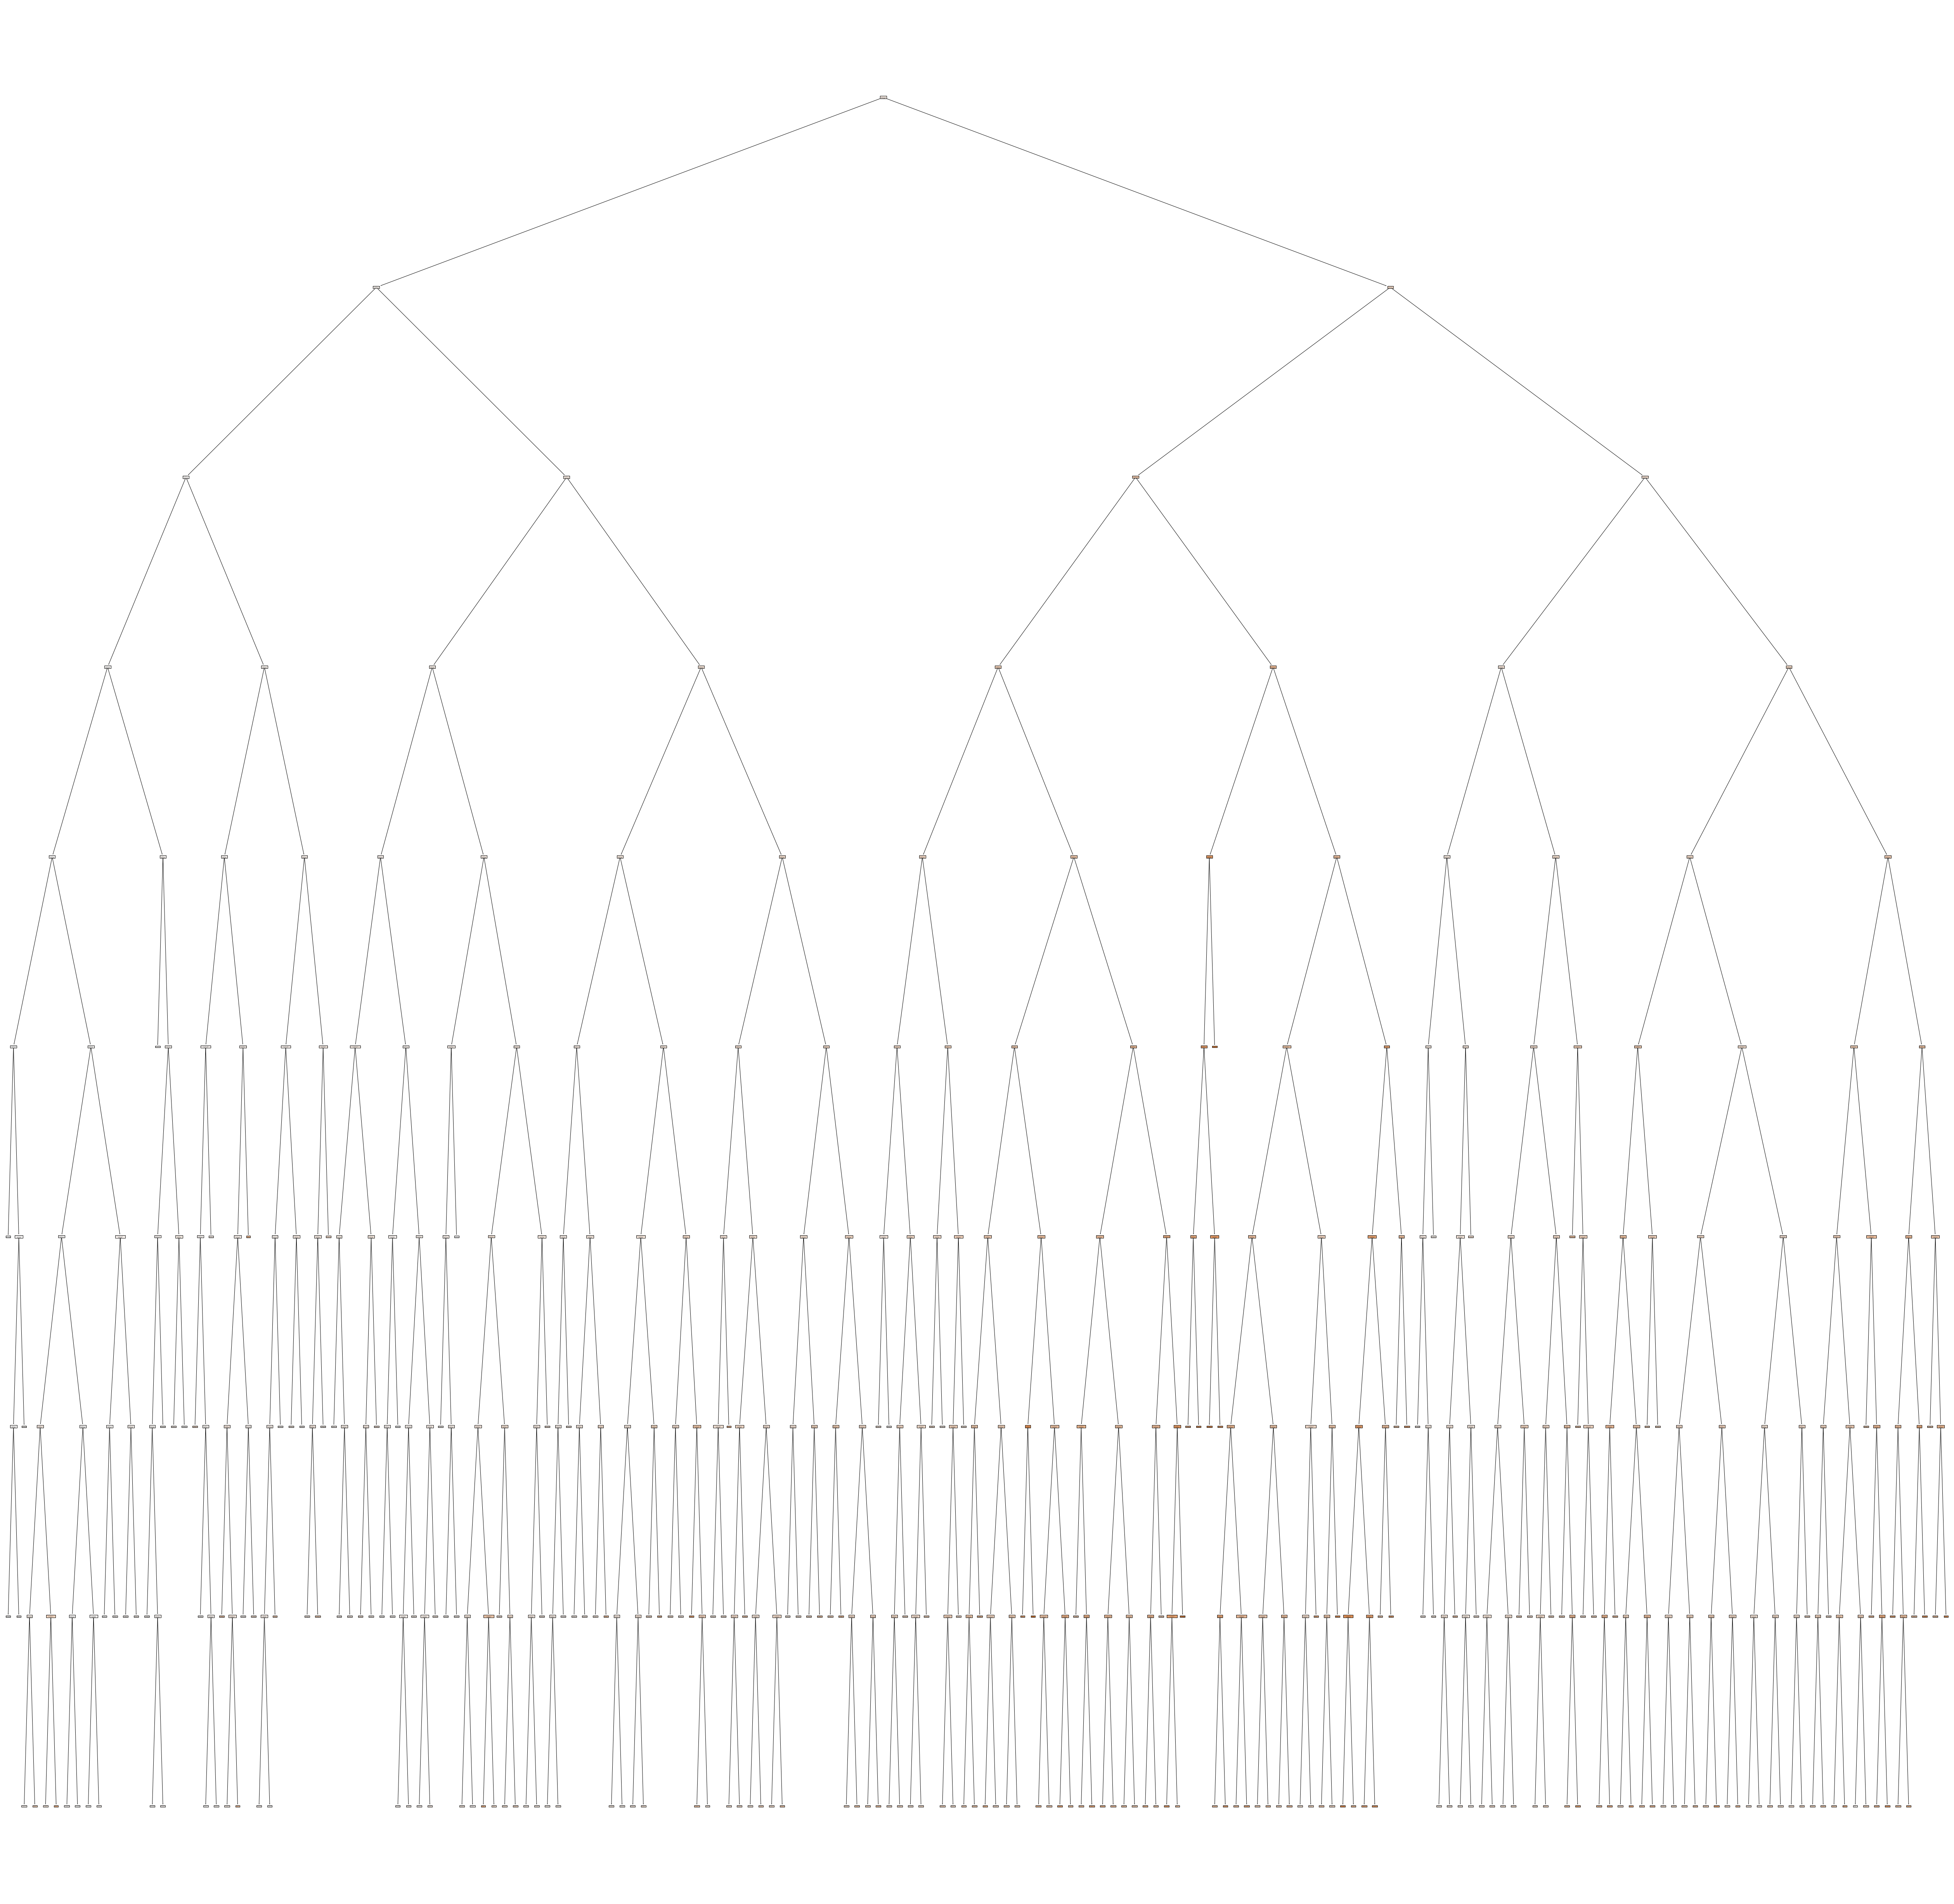

In [256]:
fig = plt.figure(figsize=(90,90))
_ = tree.plot_tree(best_DTR_model, 
                   feature_names = features_linear,
                   class_names = 'medv',
                   filled=True)

# Ensemble model for continuous number prediction 

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_dtr, y_dtr, test_size = 0.20, random_state = 5)

In [258]:
model_1 = temp_linear_model
model_2 = temp_lasso_model
model_3 = best_DTR_model

In [259]:
# training all the model on the training dataset
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [260]:
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
model_3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=250, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [262]:
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

In [263]:
pred_final = []
for i in range(0,len(pred_1)):
    pred_final.append((pred_1[i]+pred_2[i]+pred_3[i])/3.0)

In [264]:
metrics.mean_absolute_error(y_test, pred_final)

1639.893568214907

In [265]:
metrics.mean_squared_error(y_test, pred_final)

7038011.437801496

In [266]:
np.sqrt(metrics.mean_squared_error(y_test, pred_final))

2652.925072029268

In [267]:
#Find r square
rsquare=r2_score(y_test, pred_final)   
rsquare

0.8222349341897836

In [268]:
#Calculate adjusted R square
1-(1-rsquare)*((len(X_test)-1)/(len(X_test)-len(X_test.columns)-1))

0.8198029995878022